###  MicroGrad demo

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from micrograd.engine import Value
from micrograd.nn import Neuron, Layer, MLP

In [3]:
np.random.seed(1337)
random.seed(1337)

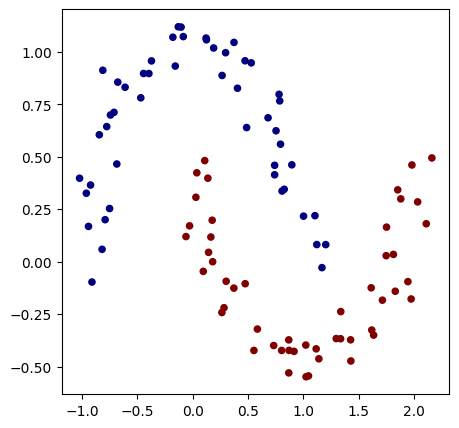

In [4]:
# make up a dataset

from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=100, noise=0.1)

y = y*2 - 1 # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [5]:
# initialize a model 
model = MLP(2, [16, 16, 1]) # 2-layer neural network
print(model)
print("number of parameters", len(model.parameters()))

MLP of [Layer(nin=2, nout=16), Layer(nin=16, nout=16), Layer(nin=16, nout=1)]
number of parameters 337


In [6]:
# loss function
def loss(batch_size=None):
    
    # inline DataLoader :)
    if batch_size is None:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    inputs = [list(map(Value, xrow)) for xrow in Xb]
    
    # forward the model to get scores
    scores = list(map(model, inputs))
    
    # svm "max-margin" loss
    losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))
    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss
    
    # also get accuracy
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

total_loss, acc = loss()
print(total_loss, acc)

Value(data=0.9093183735831943) 0.73


In [7]:
print("Linear Activation:\n")
# optimization
for k in range(100):
    
    # forward
    total_loss, acc = loss()
    
    # backward
    model.zero_grad()
    total_loss.backward()
    
    # update (sgd)
    learning_rate = 0.1 * (1.0 - 0.9*k/100)
    for p in model.parameters():
        p.data -= learning_rate * p.grad
    
    if k % 1 == 0:
        print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")


Linear Activation:

step 0 loss 0.9093183735831943, accuracy 73.0%
step 1 loss 0.4855929544903315, accuracy 78.0%
step 2 loss 0.3905468666535479, accuracy 82.0%
step 3 loss 0.3580449463523705, accuracy 84.0%
step 4 loss 0.39660641153259135, accuracy 81.0%
step 5 loss 0.5138823524584673, accuracy 80.0%
step 6 loss 0.33322821738539055, accuracy 86.0%
step 7 loss 0.3212495839167502, accuracy 85.0%
step 8 loss 0.3481276226226911, accuracy 85.0%
step 9 loss 0.3208054336630756, accuracy 84.0%
step 10 loss 0.34162063996903075, accuracy 86.0%
step 11 loss 0.31070141040078225, accuracy 87.0%
step 12 loss 0.3125795331582071, accuracy 87.0%
step 13 loss 0.3328149729579882, accuracy 85.0%
step 14 loss 0.328287392078553, accuracy 86.0%
step 15 loss 0.3135445226292847, accuracy 88.0%
step 16 loss 0.3191126222157345, accuracy 88.0%
step 17 loss 0.32094201251126414, accuracy 85.0%
step 18 loss 0.3268116653454398, accuracy 86.0%
step 19 loss 0.3127614144627616, accuracy 88.0%
step 20 loss 0.30844123801

Text(0.5, 1.0, 'Linear Accuracy: 88.0')

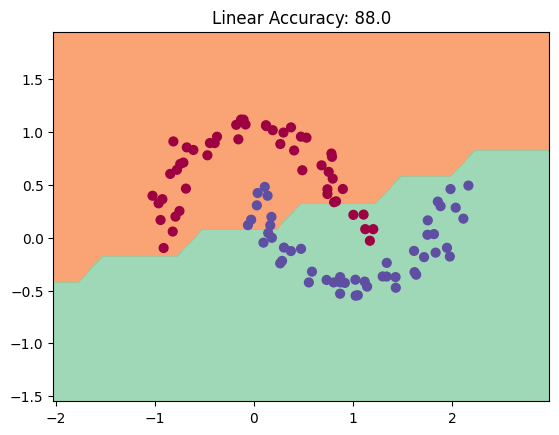

In [8]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"Linear Accuracy: {acc*100}")

In [9]:
# initialize a model 
model = MLP(2, [16, 16, 1], act='relu') # 2-layer neural network
print(model)
print("number of parameters", len(model.parameters()))

MLP of [Layer(nin=2, nout=16), Layer(nin=16, nout=16), Layer(nin=16, nout=1)]
number of parameters 337


In [10]:
print("ReLU Activation (non-linear):\n")
# optimization
for k in range(100):
    
    # forward
    total_loss, acc = loss()
    
    # backward
    model.zero_grad()
    total_loss.backward()
    
    # update (sgd)
    learning_rate = (1.0 - 0.9*k/100)
    for p in model.parameters():
        p.data -= learning_rate * p.grad
    
    if k % 1 == 0:
        print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")


ReLU Activation (non-linear):

step 0 loss 1.2606891092765604, accuracy 24.0%
step 1 loss 0.9442463519767778, accuracy 78.0%
step 2 loss 0.4107866700456136, accuracy 83.0%
step 3 loss 0.3379238727847242, accuracy 87.0%
step 4 loss 0.29089823651799285, accuracy 88.0%
step 5 loss 0.25812466062214995, accuracy 91.0%
step 6 loss 0.24635683434457753, accuracy 89.0%
step 7 loss 0.35128563599764007, accuracy 90.0%
step 8 loss 0.5500432035581851, accuracy 82.0%
step 9 loss 0.4200738714474908, accuracy 86.0%
step 10 loss 0.28142665110081905, accuracy 87.0%
step 11 loss 0.2228062826612772, accuracy 89.0%
step 12 loss 0.18847340669400534, accuracy 92.0%
step 13 loss 0.2020852225794971, accuracy 92.0%
step 14 loss 0.2069394557936187, accuracy 92.0%
step 15 loss 0.2485399967192639, accuracy 90.0%
step 16 loss 0.16149171548914237, accuracy 92.0%
step 17 loss 0.15300691563647675, accuracy 93.0%
step 18 loss 0.15574154514031546, accuracy 92.0%
step 19 loss 0.15819656536268292, accuracy 94.0%
step 20 l

Text(0.5, 1.0, 'Non-Linear Accuracy: 100.0')

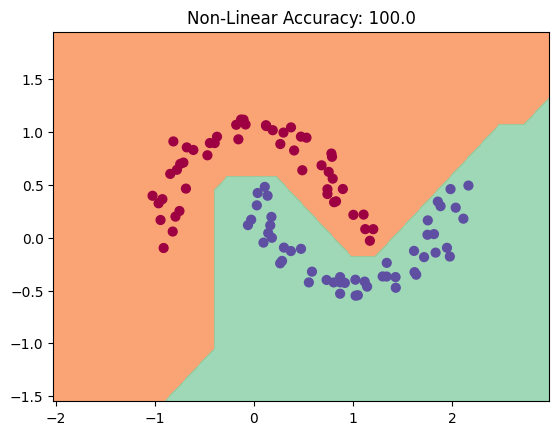

In [11]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"Non-Linear Accuracy: {acc*100}")